# Project 4: Wrange and Analyze Data

## Table of Contents
<a href="#gather">Gathering Data</a>

<a href="#assess">Assessing Data</a>

<a href="#clean">Cleaning Data</a>

<a href="#analysis">Analysis Data</a>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

<a id='gather'></a>
## Gathering Data

In [2]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [3]:
#checking properties of dataframe
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
#getting the file from image predictions file from Udacity url
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
response

<Response [200]>

In [5]:
#saving the file with content
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [6]:
#reading the file into dataframe
df_prediction = pd.read_csv('image_predictions.tsv', sep='\t')
df_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
#downloaded tweet_json.txt manually from Udacity and extracted required info (using json library loads function)

df_list = []
with open('tweet-json.txt') as json_file:
    for line in json_file:
        data = json.loads(line)
        df_list.append({ 'tweet_id': data['id'], 'retweet_count': data['retweet_count'], 'favorite_count': data['favorite_count'] }) 

In [9]:
#creating dataframe from extracted data through df_list
df_count = pd.DataFrame(df_list)
df_count.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [10]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [11]:
#saving the dataframe as csv in memory
df_count.to_csv('tweets_data_extract', index=False)

## Assessing Data
<a id='assess'></a>

#### We've gathered all the required data into three dataframes: df_twitter, df_prediction, df_count. Now we can proceed to next step i.e., Assessing this gathered data

###### Assessing df_twitter dataset

In [12]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
df_twitter.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [15]:
# checking for duplicacy of records
df_twitter.duplicated().sum()

0

In [16]:
#using descriptive statistics
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Conclusions from df_twitter info:
- The timestamp field is in object (pointer to string)
- Missing expanded_urls for some records
- Some name are not correct like a, None etc
- rating_numerator minimum values is 0 and max value is 1776 (as per instructions, this is wrongly captured)
- rating_denominator minimum values is 0 and max value is 170 (as per instructions, this is wrongly captured)
- Extra columns like in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id
- There are 4 columns for representing dog stages (doggo, floofer, pupper, puppo) - indicating one variable

###### Assessing prediction_df dataset

In [17]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
df_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
df_prediction.duplicated().sum()

0

- Less number of records than df_twitter dataframe

###### Assessing df_count dataset

In [20]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [21]:
df_count.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [22]:
df_count.duplicated().sum()

0

- We can merge this dataset with df_twitter dataset

### Assessment Conclusions
**Quality Issues:**

df_twitter:
- The timestamp field is in object (pointer to string)
- Missing expanded_urls for some records
- Some name are not correct like a, None
- Rating_numerator max value is 1776 (this is wrongly captured)
- Rating_denominator minimum values is 0 and max value is 170 (this is wrongly captured)
- Contains retweets
- Contains replies
- Extra columns like in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id
- Multiple stages for few dogs

df_prediction:
- prediction columns contain mixed string i.e., some are starting from capital and some are from lower

**Tidiness Issues:**
- There are 4 columns for representing dog stages (doggo, floofer, pupper, puppo) - indicating one variable in df_twitter.
- This dataset should be merged with df_twitter dataset


## Cleaning
<a id='clean'></a>

We've assessed the issues in our data, now we'll proceed final step of Data Wrangling i.e., Cleaning

In [23]:
#making copies of dataframes before cleaning
df_twitter_clean = df_twitter.copy()
df_prediction_clean = df_prediction.copy()
df_count_clean = df_count.copy()

Addressing completeness issues first

In [24]:
df_twitter_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


- Contains retweets

In [25]:
#Contains retweet
df_twitter_clean[df_twitter_clean.retweeted_status_id.notnull()].shape[0]

181

**Define:** dropping these 181 records from df_twitter as we're only intersted in original tweets

In [26]:
#code
df_twitter_clean = df_twitter_clean[~df_twitter_clean.retweeted_status_id.notnull()]

In [27]:
#Testing
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [28]:
df_twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [29]:
#Contains retweets
df_twitter_clean[df_twitter_clean.in_reply_to_status_id.notnull()].shape[0]

78

**Define:** dropping these 78records from df_twitter

In [30]:
df_twitter_clean = df_twitter_clean[~df_twitter_clean.in_reply_to_status_id.notnull()]

In [31]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [32]:
#Extra columns like retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp
df_twitter_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [33]:
#Testing
df_twitter_clean.info(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


###### Addressing Tidiness issues now

- There are 4 columns for representing dog stages (doggo, floofer, pupper, puppo) - indicating one variable in df_twitter.

In [34]:
df_twitter_clean[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ','.join(x), axis=1).unique()

array(['None,None,None,None', 'doggo,None,None,None',
       'None,None,None,puppo', 'None,None,pupper,None',
       'None,floofer,None,None', 'doggo,None,None,puppo',
       'doggo,floofer,None,None', 'doggo,None,pupper,None'], dtype=object)

**Define:** making one column stages for dog stages from 4 columns in source data

In [35]:

df_twitter_clean['stages'] = df_twitter_clean[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ','.join(x), axis=1)
df_twitter_clean['stages'].replace('None,None,None,None','None', inplace=True)
df_twitter_clean['stages'].replace('doggo,None,None,None','doggo', inplace=True)
df_twitter_clean['stages'].replace('None,None,None,puppo','puppo', inplace=True)
df_twitter_clean['stages'].replace('None,None,pupper,None','pupper', inplace=True)
df_twitter_clean['stages'].replace('None,floofer,None,None','floofer', inplace=True)
df_twitter_clean['stages'].replace('doggo,None,None,puppo','doggo,puppo', inplace=True)
df_twitter_clean['stages'].replace('doggo,floofer,None,None','doggo,floofer', inplace=True)
df_twitter_clean['stages'].replace('doggo,None,pupper,None','doggo,pupper', inplace=True)

In [36]:
#dropping these columns
df_twitter_clean.drop(['doggo','floofer', 'pupper','puppo'], axis=1, inplace= True)

In [37]:
#Testing
df_twitter_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages
1486,693109034023534592,2016-01-29 16:30:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Thank you friend that was a swell petting"" 11...",https://twitter.com/dog_rates/status/693109034...,11,10,None,None
2040,671544874165002241,2015-12-01 04:22:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Interesting dog here. Very large. Purple. Mani...,https://twitter.com/dog_rates/status/671544874...,6,10,None,None
1086,738166403467907072,2016-06-02 00:32:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Axel. He's a professional leaf catcher...,https://twitter.com/dog_rates/status/738166403...,12,10,Axel,None
127,867900495410671616,2017-05-26 00:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable. We only rate dogs. Please don't ...,https://twitter.com/dog_rates/status/867900495...,12,10,None,None
2093,670780561024270336,2015-11-29 01:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Traviss. He has no ears. Two rare dogs...,https://twitter.com/dog_rates/status/670780561...,7,10,Traviss,None


- Multiple stages for few dogs

**Define:** Drop these rows

In [38]:
df_twitter_clean.query('stages != "None"').stages.value_counts()

pupper           221
doggo             72
puppo             23
floofer            9
doggo,pupper       9
doggo,puppo        1
doggo,floofer      1
Name: stages, dtype: int64

In [39]:
index = df_twitter_clean.query('stages == "doggo,pupper" or stages == "doggo,floofer" or stages == "doggo,puppo"').index
index

Int64Index([191, 200, 460, 531, 575, 705, 733, 889, 956, 1063, 1113], dtype='int64')

In [40]:
#code
df_twitter_clean.drop(labels=[191, 200, 460, 531, 575, 705, 733, 889, 956, 1063, 1113], inplace=True)

In [41]:
#testing
df_twitter_clean.query('stages == "doggo,pupper" or stages == "doggo,floofer" or stages == "doggo,puppo"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages


- This dataset should be merged with df_count dataset

In [42]:
df_count_clean.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


**Define:** Merging the dataframes df_twitter_clean and df_count_clean

In [43]:
#code
df_twitter_clean = pd.merge(left=df_twitter_clean, right=df_count_clean, how='left', on='tweet_id')

In [44]:
#Testing
df_twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,39467,8853
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33819,6514
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,25461,4328
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,42908,8964
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,41048,9774


In [45]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2085
Data columns (total 11 columns):
tweet_id              2086 non-null int64
timestamp             2086 non-null object
source                2086 non-null object
text                  2086 non-null object
expanded_urls         2083 non-null object
rating_numerator      2086 non-null int64
rating_denominator    2086 non-null int64
name                  2086 non-null object
stages                2086 non-null object
favorite_count        2086 non-null int64
retweet_count         2086 non-null int64
dtypes: int64(5), object(6)
memory usage: 195.6+ KB


**Define:** Merging the dataframes df_twitter_clean and df_prediction_clean

In [46]:
#code
df_twitter_clean = pd.merge(left=df_twitter_clean, right=df_prediction_clean, how='inner', on='tweet_id')

In [47]:
#Testing
df_twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33819,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,25461,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,42908,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,41048,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [48]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 1960
Data columns (total 22 columns):
tweet_id              1961 non-null int64
timestamp             1961 non-null object
source                1961 non-null object
text                  1961 non-null object
expanded_urls         1961 non-null object
rating_numerator      1961 non-null int64
rating_denominator    1961 non-null int64
name                  1961 non-null object
stages                1961 non-null object
favorite_count        1961 non-null int64
retweet_count         1961 non-null int64
jpg_url               1961 non-null object
img_num               1961 non-null int64
p1                    1961 non-null object
p1_conf               1961 non-null float64
p1_dog                1961 non-null bool
p2                    1961 non-null object
p2_conf               1961 non-null float64
p2_dog                1961 non-null bool
p3                    1961 non-null object
p3_conf               1961 non-null float

### Cleaning Quality issues

- The timestamp field is in object (pointer to string)

**Define:** convert the timestamp field to datetime object using pandas datetime funtion

In [49]:
#code
df_twitter_clean['timestamp'] = pd.to_datetime(df_twitter_clean['timestamp'])
#df_twitter_clean.timestamp = pd.to_datetime(df_twitter_clean.timestamp)

In [50]:
#testing
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 1960
Data columns (total 22 columns):
tweet_id              1961 non-null int64
timestamp             1961 non-null datetime64[ns]
source                1961 non-null object
text                  1961 non-null object
expanded_urls         1961 non-null object
rating_numerator      1961 non-null int64
rating_denominator    1961 non-null int64
name                  1961 non-null object
stages                1961 non-null object
favorite_count        1961 non-null int64
retweet_count         1961 non-null int64
jpg_url               1961 non-null object
img_num               1961 non-null int64
p1                    1961 non-null object
p1_conf               1961 non-null float64
p1_dog                1961 non-null bool
p2                    1961 non-null object
p2_conf               1961 non-null float64
p2_dog                1961 non-null bool
p3                    1961 non-null object
p3_conf               1961 non-nu

- Missing expanded_urls for some records

In [51]:
sum(df_twitter_clean.expanded_urls.isna())

0

**Define:** Drop the 3 lines where url is missing

In [52]:
#code
df_twitter_clean = df_twitter_clean[~df_twitter_clean.expanded_urls.isna()]

In [53]:
#Test
sum(df_twitter_clean.expanded_urls.isna())

0

- Some name are not correct like a, None

In [54]:
df_twitter_clean.name.value_counts()

None           519
a               55
Charlie         11
Cooper          10
Oliver          10
Lucy            10
Penny            9
Tucker           9
Winston          8
Sadie            8
the              7
Lola             7
Daisy            7
Toby             7
Koda             6
Stanley          6
an               6
Bo               6
Bella            6
Jax              6
Bailey           5
Chester          5
Scout            5
Dave             5
Oscar            5
Milo             5
Buddy            5
Leo              5
Louis            5
Rusty            5
              ... 
Tycho            1
Al               1
Siba             1
Randall          1
Darla            1
Edmund           1
Kenny            1
Ralphus          1
Gustav           1
Kellogg          1
Moreton          1
Stella           1
Reptar           1
Cedrick          1
infuriating      1
Harper           1
Harvey           1
Cal              1
Tassy            1
Furzey           1
actually         1
Harnold     

Mostly names which are starting with lowercase are incorrect

In [55]:
df_twitter_clean[df_twitter_clean.name.str.contains('^[a-z]')].name.unique()

array(['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not',
       'his', 'an', 'getting', 'this', 'unacceptable', 'all',
       'infuriating', 'just', 'the', 'actually', 'by', 'officially',
       'light', 'space'], dtype=object)

In [56]:
incorrect_names = df_twitter_clean[df_twitter_clean.name.str.contains('^[a-z]')].index
incorrect_names

Int64Index([  21,   49,  134,  146,  270,  397,  463,  572,  586,  612,  670,
             722,  726,  727,  734,  736,  744,  748,  754,  769,  788,  811,
             832,  833,  849,  902,  912,  956, 1026, 1035, 1044, 1045, 1050,
            1062, 1065, 1112, 1129, 1163, 1186, 1252, 1331, 1361, 1373, 1382,
            1416, 1427, 1444, 1476, 1477, 1499, 1500, 1538, 1551, 1555, 1569,
            1608, 1615, 1633, 1644, 1648, 1650, 1678, 1728, 1737, 1740, 1758,
            1764, 1772, 1800, 1807, 1813, 1820, 1826, 1830, 1843, 1857, 1863,
            1870, 1879, 1893, 1909, 1916, 1919, 1931, 1932, 1938, 1939, 1940,
            1950, 1951, 1952, 1953, 1954, 1955, 1957, 1958, 1959],
           dtype='int64')

**Define:** Assigning None to all these wrong names

In [57]:
#code
df_twitter_clean.loc[incorrect_names, 'name'] = 'None'

In [58]:
#test
df_twitter_clean[df_twitter_clean.name.str.contains('^[a-z]')].name.unique()

array([], dtype=object)

- Rating_numerator max value is 1776 (this is wrongly captured)

In [59]:
df_twitter_clean.rating_numerator.unique()

array([  13,   12,   14,    5,   11,    6,   10,    0,   84,   24,   75,
         27,    3,    7,    8,    9,    4,  165, 1776,  204,   50,   99,
         80,   45,   60,   44,  121,   26,    2,  144,   88,    1,  420])

In [60]:
index = df_twitter_clean.query('rating_numerator > 20').index

In [61]:
df_twitter_clean.loc[339].text

"Name a more iconic quartet... I'll wait. 13/10 for all https://t.co/kCLgD8687T"

**Define:** dropping these records where rating is greater than 20


In [62]:
#code
df_twitter_clean = df_twitter_clean[df_twitter_clean.rating_numerator < 20]

In [63]:
#test
df_twitter_clean.query('rating_numerator > 20')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


- Rating_denominator minimum values is 0 and max value is 170 (this is wrongly captured)

**Define:** Rating_denominator should be 10, as per instructions

In [64]:
#code
df_twitter_clean = df_twitter_clean.assign(rating_denominator=10)

In [65]:
#test
df_twitter_clean.rating_denominator.unique()

array([10])

- prediction columns contain mixed string i.e., some are starting from capital and some are from lower

**Define:** Covert all names with low caps

In [66]:
#code
[df_twitter_clean.p1,df_twitter_clean.p2,df_twitter_clean.p3] = [df_twitter_clean.p1.str.lower(),df_twitter_clean.p2.str.lower(),df_twitter_clean.p3.str.lower()]

In [67]:
#test
df_twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33819,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,25461,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,42908,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,41048,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [68]:
df_twitter_clean.img_num = df_twitter_clean.img_num.astype(int)

In [69]:
#Storing the cleaned file
df_twitter_clean.to_csv('twitter_archive_master.csv', index=False)

## Analysis
<a id='analysis'></a>

In [70]:
df_twitter_clean.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1.943000e+03,1943.000000,1943.0,1943.000000,1943.000000,1943.000000,1943.000000,1.943000e+03,1.943000e+03
mean,7.358484e+17,10.523932,10.0,8938.591868,2776.771487,1.203809,0.593531,1.351442e-01,6.020988e-02
std,6.768157e+16,2.189131,0.0,12283.766232,4701.166397,0.561965,0.272280,1.012118e-01,5.085929e-02
min,6.660209e+17,0.000000,10.0,81.000000,16.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.757610e+17,10.000000,10.0,1949.000000,621.500000,1.000000,0.360447,5.397835e-02,1.608055e-02
50%,7.083495e+17,11.000000,10.0,4110.000000,1350.000000,1.000000,0.587372,1.186220e-01,4.948690e-02
75%,7.880951e+17,12.000000,10.0,11413.500000,3239.000000,1.000000,0.845942,1.963605e-01,9.153815e-02
max,8.924206e+17,14.000000,10.0,132810.000000,79515.000000,4.000000,1.000000,4.880140e-01,2.710420e-01


In [71]:
#Top predictions
df_twitter_clean.p1.value_counts().head()

golden_retriever      131
labrador_retriever     91
pembroke               88
chihuahua              78
pug                    54
Name: p1, dtype: int64

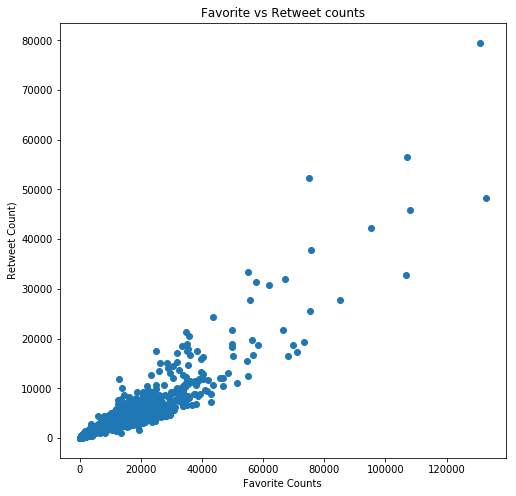

In [72]:
#Favorite vs Retweet count graph

plt.figure(figsize = (8, 8))
plt.scatter(df_twitter_clean.favorite_count, df_twitter_clean.retweet_count)
plt.title('Favorite vs Retweet counts')
plt.xlabel('Favorite Counts')
plt.ylabel('Retweet Count)')
plt.show()

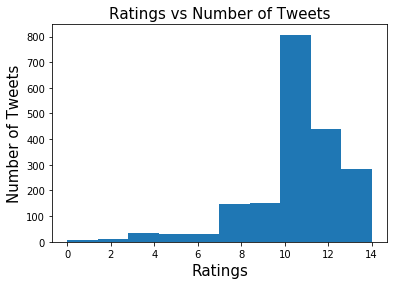

In [73]:
df_twitter_clean['rating_numerator'].plot(kind = 'hist', bins = 10)

plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('Number of Tweets', fontsize = 15)
plt.title('Ratings vs Number of Tweets', fontsize = 15)
plt.show();

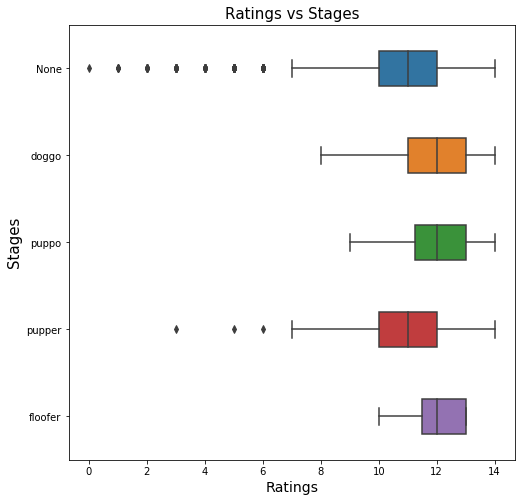

In [74]:
plt.figure(figsize = (8, 8))
bplot = sns.boxplot(y = 'stages', x = 'rating_numerator', data = df_twitter_clean, orient = 'h',width = 0.4)

plt.title('Ratings vs Stages', fontsize = 15)
plt.ylabel("Stages",  fontsize = 15)
plt.xlabel('Ratings',  fontsize = 14)
plt.show()

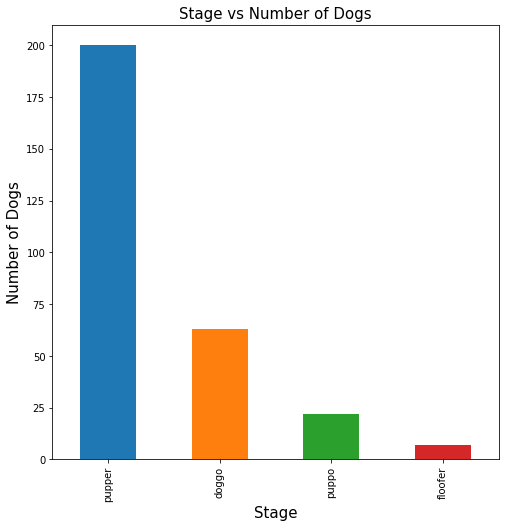

In [75]:
df_twitter_clean.query('stages != "None"').stages.value_counts().plot(kind='bar', figsize=(8,8))
plt.xlabel('Stage', fontsize = 15)
plt.ylabel('Number of Dogs', fontsize = 15)
plt.title('Stage vs Number of Dogs', fontsize = 15)
plt.show();

In [76]:
df_twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33819,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,25461,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,42908,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,41048,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [77]:
#Top 5 dogs with highest retweet_count
df_twitter_clean.sort_values('retweet_count', ascending = False).head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
761,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,131075,...,1,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
393,807106840509214720,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,107015,...,1,chihuahua,0.505370,True,pomeranian,0.120358,True,toy_terrier,0.077008,True
795,739238157791694849,2016-06-04 23:31:25,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,75163,...,1,eskimo_dog,0.503372,True,siberian_husky,0.390413,True,malamute,0.080901,True
304,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,puppo,132810,...,1,lakeland_terrier,0.196015,True,labrador_retriever,0.160329,True,irish_terrier,0.069126,True
58,879415818425184262,2017-06-26 19:07:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,None,107956,...,1,english_springer,0.383404,True,boston_bull,0.134967,True,cardigan,0.110481,True


In [78]:
#Top 5 dogs with highest favorite_count
df_twitter_clean.sort_values('favorite_count', ascending = False).head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
304,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,puppo,132810,...,1,lakeland_terrier,0.196015,True,labrador_retriever,0.160329,True,irish_terrier,0.069126,True
761,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,131075,...,1,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
58,879415818425184262,2017-06-26 19:07:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,None,107956,...,1,english_springer,0.383404,True,boston_bull,0.134967,True,cardigan,0.110481,True
393,807106840509214720,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,107015,...,1,chihuahua,0.505370,True,pomeranian,0.120358,True,toy_terrier,0.077008,True
108,866450705531457537,2017-05-22 00:28:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,pupper,106827,...,2,french_bulldog,0.905334,True,boston_bull,0.078060,True,pug,0.001771,True


## End of Analysis

#### Project Submitted by:
#### Bharat.